    Denne opgave er en del af NumPy-tutorials fra deres officielle hjemmeside. Du skal læse dokumentet igennem og lave så mange af øvelserne som muligt. Til sidst kan du finde alle svarene her:
https://numpy.org/numpy-tutorials/content/mooreslaw-tutorial.html
    
# Bestemmelse af Moore’s lov med rigtige data i NumPy
Gordon Moore fremsatte en empirisk forudsigelse om, at antallet af transistorer på en computerchip ville fordobles hvert andet år. Denne forudsigelse blev kendt som Moore’s lov. Gordon Moore havde oprindeligt kun forventet, at denne empiriske sammenhæng ville gælde fra 1965 til 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],men semiconductor producenter var i stand til at følge Moore’s lov helt frem til 2015.

I denne opgave skal du:

- Læs og analysere rigtige data for antal transistor i semiconductor over tid,
- Sammenligne Moores forudsigelse med de rigtige data,
- Visualisere udviklingen grafisk ved hjælp af NumPy og Matplotlib,

## Hvad du skal bruge
Du vil anvende disse NumPy- og Matplotlib-funktioner:

- `np.loadtxt`: indlæser tekst i et NumPy-array
- `np.log`: tager den naturlige logaritme af alle elementer i et NumPy-array
- `np.exp`: tager den eksponentielle funktion af alle elementer i et NumPy-array
- `lambda`: en minimal funktionsdefinition til at lave en model-funktion
- `plt.semilogy`: plotter x-y-data med lineær x-akse og logaritmisk y-akse
- `plt.plot`: plotter x-y-data med lineære akser
- `array-slicing`
- `boolean array indexing`
- `np.block`: kombiner arrays til 2D-arrays
- `np.newaxis`: ændrer et 1D-array til en række- eller kolonnevektor
- `np.savez` og `np.savetxt`: gemmer arrays i henholdsvis komprimeret NumPy-format og som tekst

## Del 1: læs data

I repo findes en CSV fil, "Moores_Law.csv" hentet fra [transistor count](http://www.transistorcount.com/#2020s)

1. Brug kommandoen `!head Moores_Law.csv` til at se de første linjer af CSV-filen. Hvad er overskrifterne for kolonnerne?
2. Indlæs CSV-filen. Du behøver ikke de kolonner, der angiver Processor, Designer, MOSprocess eller Area. Du skal kun bruge den anden og tredje kolonne, nemlig **Transistors** og **Date**. Dernæst skal du indlæse disse to kolonner i et NumPy-array `data` ved hjælp af `np.genfromtxt`. De ekstra indstillinger nedenfor sørger for, at data kommer i det ønskede format:

- delimiter=',': angiver komma ',' som separator i CSV-filen
- usecols=[1,2]: importerer den anden og tredje kolonne fra CSV-filen
- skip_header=1: springer den første række over, fordi den er en overskriftsrække (header)

In [2]:
import numpy as np
data = np.genfromtxt(
    'Moores_Law.csv',
    delimiter=',',
    usecols=[1,2],
    skip_header=1
    )

Du har nu indlæst hele historien om semiconductor i et NumPy-array kaldet `data`. Den første kolonne indeholder antallet af MOS-transistorer, og den anden kolonne indeholder introduktionsåret skrevet med fire cifre.

3. Du skal gøre dataene lettere at læse og arbejde med ved at tildele de to kolonner til variablerne `year` og `transistor_count`. Udskriv de første 10 værdier ved at anvende slicing [:10] på year- og transistor_count-arrays.
Udskriv derefter disse værdier for at tjekke, at du har gemt dataene i de rigtige variabler.

In [45]:
transistor_count = data[:-1,0]
year = data[:-1,1]
print(transistor_count[:10])
print(year[:10])

[ 3510.  5000.  2300.  4500.  3500.  4100.  6500.  9000.  8500. 25000.]
[1975. 1974. 1971. 1974. 1972. 1974. 1976. 1978. 1976. 1985.]


## Del 2: data analyse

1. Brug `np.log` til at tage den naturlige logaritme af antal transistor der gemmes i `transistor_count`.
2. Tegn et scatter-plot af årstal `year` (x-akse) mod  `log_transistor_count` (y-akse).
3. Brug `stats.linregress` fra **scipy** til at lave et lineært fit på log-data og tegn i den samme plot. Hvad ser du? Passer punkterne nogenlunde til en ret linje?

In [46]:
log_transistor_count = np.log(transistor_count)
print(log_transistor_count)

[ 8.16337132  8.51719319  7.7406644   8.41183268  8.16051825  8.31874225
  8.77955746  9.10497986  9.04782144 10.1266311   8.98719682 10.27505111
 10.27505111 10.91508846 10.30895266 11.12726298  9.35010231 12.15477935
  9.99879773 12.52452638 12.51722707 11.80559508 12.10071213 12.64432758
 14.11561515 13.98122413 13.99783211 13.26901803 14.94691267 14.73180129
 15.27412558 15.52025865 11.61728548 15.83041358 14.73180129 15.99026228
 15.83041358 16.06680236 16.90655301 17.12605357 16.87421763 17.55318018
 16.860033   17.82284374 19.2091381  17.81003478 18.47800581 17.62217305
 17.0736071  18.53400943 19.30030749 19.83166772 19.24485619 18.94540927
 20.19901719 18.94540927 19.95323761 17.66565816 19.48883383 19.03044632
 20.90558739 19.70715477 20.48627688 20.62233992 20.72326584 21.05973807
 19.25358987 20.40992402 21.25389409 21.41641302 20.44619394 21.55617496
 21.46520318 21.36511972 20.90558739 19.83410377 21.73486675 20.88026959
 21.67877728 21.54304567 20.98793514 20.87168584 21

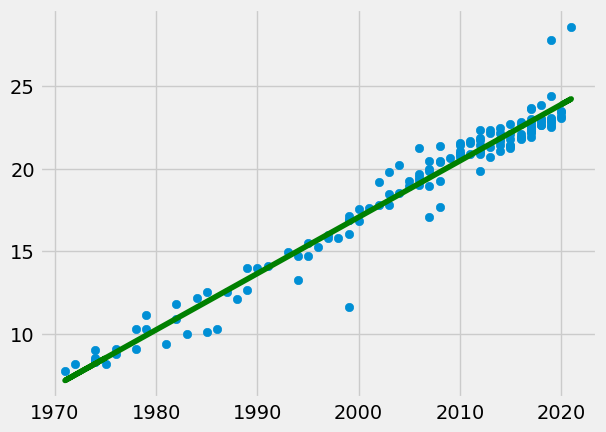

In [101]:
import matplotlib.pyplot as plt
from scipy import stats

res = stats.linregress(year, log_transistor_count)
plt.plot(year, res.intercept + res.slope*year, c='g')

plt.scatter(year, log_transistor_count)
plt.show()

## Del 3: Sammenlign med Moore’s law
Din empiriske model antager, at antallet af transistorer pr. semiconductor følger en eksponentiel vækst,

$$ transistor\_count = a\cdot b^{t-t_0}$$ 

hvor $a$ og  $b$ er konstanter, der beskriver en fordobling af antal transistor hvert andet år, og hvor udgangspunktet er 2250 transistorer i 1971. Funktionen kan afbildes som en ret linje i et enkeltlogaritmisk koordinatsystem

$$\log(transister\_count) = f(year) = AM \cdot year+BM$$

hvor $A$ and $B$ tilpasningskonstanter (fitting constants).

1. Udregn *AM* og *BM* og lav en lambda-funktion kaldet `moores_law`, som beregner antallet af transistorer pr. chip efter Moore’s lov med `year`  som inputparameter.
2. Plot både de rigtige data (scatter) og regression modellen (kurve) i samme figur på log-skala
3. Tegn også Moore’s kurve i grafen og sammenlign med dine data.

In [6]:
A_M = np.log(2) / 2
B_M = np.log(2250) - A_M * 1971
print(A_M, B_M)

0.34657359027997264 -675.3778609466276


In [99]:
moores_law = lambda year: np.exp(B_M) * np.exp(A_M * year)

model = np.polynomial.Polynomial.fit(year, log_transistor_count, deg=1)
model = model.convert()
B, A = model

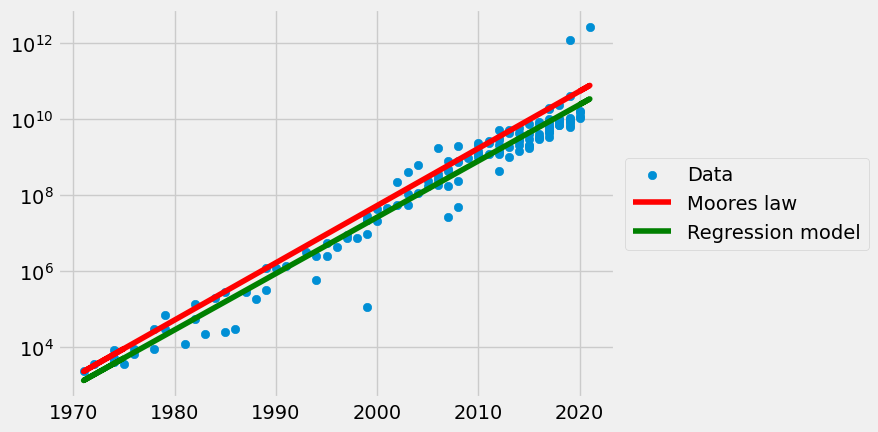

In [100]:
transistor_moores_law = moores_law(year)
transistor_count_predicted = np.exp(B) * np.exp(A * year)

plt.scatter(year, transistor_count, label="Data")
plt.plot(year, transistor_moores_law, c='r', label="Moores law")
plt.plot(year, transistor_count_predicted, c='g', label="Regression model")

plt.yscale('log')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()